Missing Data Percentage:
 Order_ID            0.000000
Product_Category    4.752475
Product_Price       3.960396
Customer_Age        2.970297
Rating              4.950495
Review_Text         4.158416
Order_Date          1.980198
dtype: float64


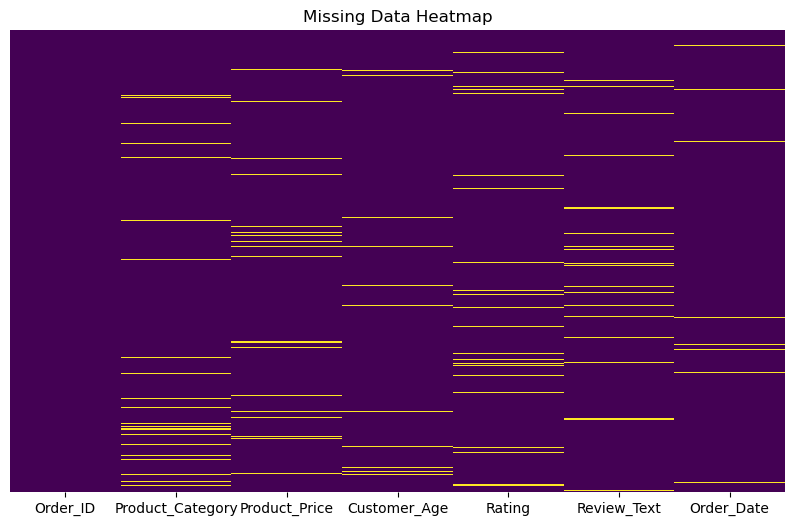

Summary Statistics Before and After Imputation:
         Order_ID  Product_Price  Customer_Age      Rating
count  505.000000     505.000000    505.000000  505.000000
mean   249.899010    2442.748515     42.110891    3.188119
std    144.769438    1387.499472     14.678958    1.117261
min      1.000000     108.000000     18.000000    1.000000
25%    124.000000    1292.000000     30.000000    3.000000
50%    250.000000    2464.000000     41.000000    3.000000
75%    375.000000    3588.000000     54.000000    4.000000
max    500.000000    4993.000000     69.000000    5.000000


C:\Users\likit\AppData\Local\Temp\ipykernel_20648\1076796986.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Price'].fillna(df['Product_Price'].median(), inplace=True)
C:\Users\likit\AppData\Local\Temp\ipykernel_20648\1076796986.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

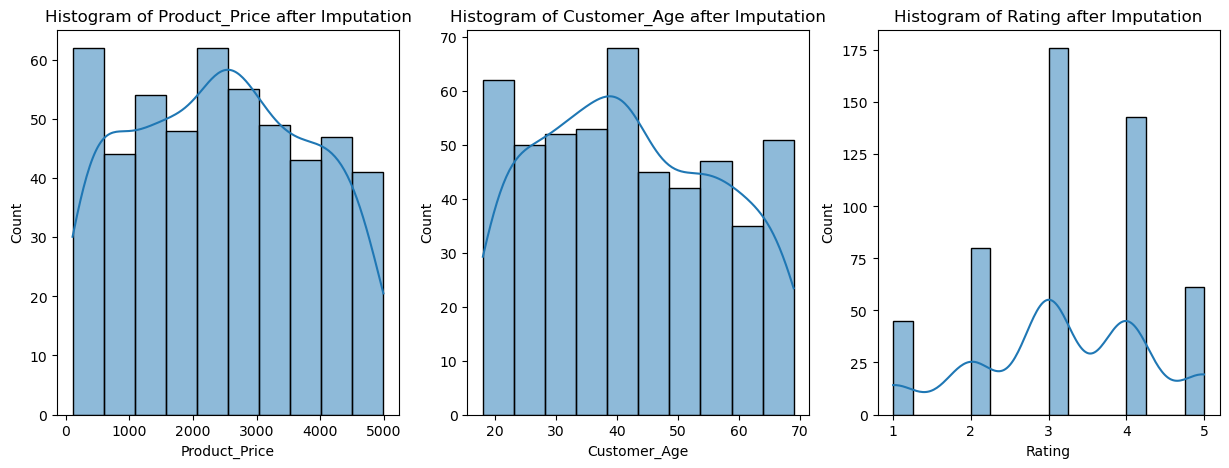

Cleaned dataset saved as 'Cleaned_E-Commerce_Data.csv'


In [4]:
#!/usr/bin/env python
# coding: utf-8



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Load the dataset
df = pd.read_csv("Day 19_E-Commerce_Data.csv")

# Identify missing data
missing_percent = df.isna().sum() / len(df) * 100
print("Missing Data Percentage:\n", missing_percent)

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

# Handling missing values
# Mean/Median imputation for numerical columns
df['Product_Price'].fillna(df['Product_Price'].median(), inplace=True)
df['Customer_Age'].fillna(df['Customer_Age'].median(), inplace=True)
df['Rating'].fillna(df['Rating'].median(), inplace=True)

# Mode imputation for categorical columns
df['Product_Category'].fillna(df['Product_Category'].mode()[0], inplace=True)

# Forward fill for date-related fields
df['Order_Date'].fillna(method='ffill', inplace=True)

# KNN imputation for complex cases
imputer = KNNImputer(n_neighbors=5)
numeric_cols = ['Product_Price', 'Customer_Age', 'Rating']
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Evaluate impact
print("Summary Statistics Before and After Imputation:")
print(df.describe())

# Visualize imputed values
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col} after Imputation')
plt.show()

# Save the cleaned dataset
df.to_csv("Cleaned_E-Commerce_Data.csv", index=False)
print("Cleaned dataset saved as 'Cleaned_E-Commerce_Data.csv'")





